In [2]:
!pip install pymongo

   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---

In [5]:
from pymongo import MongoClient

# For local MongoDB instance (via Compass)
client = MongoClient('mongodb://localhost:27017/')
db = client['mydatabase']

# # For MongoDB Atlas (cloud)
# client = MongoClient('mongodb+srv://<username>:<password>@cluster0.mongodb.net/test?retryWrites=true&w=majority')
# db = client['mydatabase']

# Check if the connection is successful by listing databases
try:
    databases = client.list_database_names()  # List all databases
    print("Connected to MongoDB!")
    print("Databases:", databases)
except Exception as e:
    print("Failed to connect to MongoDB:", e)


Connected to MongoDB!
Databases: ['admin', 'config', 'local']


In [18]:
from pymongo import MongoClient
import json

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017')

# Select or create the database
db = client['sales_data_json']

# Select or create the collections
products_collection = db['products']
clients_collection = db['clients']
sales_collection = db['sales']

# Read JSON file and insert data into the 'products' collection
with open('data-json/produits_sous-categorie.json') as f:
    products_data = json.load(f)
    products_collection.insert_many(products_data)

# Similarly, you can load data for clients and sales
with open('data-json/clients.json') as f:
    clients_data = json.load(f)
    clients_collection.insert_many(clients_data)

# Similarly, you can load data for clients and sales
with open('data-json/ventes.json') as f:
    sales_data = json.load(f)
    sales_collection.insert_many(sales_data)

# Verify data inserted
print(f"Products count: {products_collection.count_documents({})}")
print(f"Clients count: {clients_collection.count_documents({})}")
print(f"sales count: {sales_collection.count_documents({})}")


Products count: 1009464
Clients count: 1345952
sales count: 336488


In [19]:
# Check if connected to the correct database
print(db.list_collection_names())  # Should list all collections in the database


['sales', 'products', 'clients']


In [20]:
# Print one document from the 'products' collection
print(db.products.find_one())  # This prints the first document found


{'_id': ObjectId('671a2345c998ed2a82396ec7'), 'product_id': '0_1483', 'category': 'Vêtements', 'sub_category': 'T-shirts', 'price': '4,99', 'stock_quantity': '48'}


In [23]:
# Check data types of 'price' and 'stock_quantity'
products = db.products.find_one()
print(type(products['stock_quantity']))


<class 'str'>


### Change the default datatypes to int and float

In [24]:
# Convert 'price' and 'stock_quantity' to proper types
products = db.products.find()

for product in products:
    # Convert price from string to float (replacing ',' with '.')
    new_price = float(product['price'].replace(',', '.'))
    
    # Convert stock_quantity from string to int
    new_stock_quantity = int(product['stock_quantity'])
    
    # Update the document in MongoDB
    db.products.update_one(
        {'_id': product['_id']},  # Filter by _id to update the correct document
        {'$set': {'price': new_price, 'stock_quantity': new_stock_quantity}}  # Set new values
    )

print("Data types updated successfully!")


Data types updated successfully!


In [27]:
print(db.products.find_one())

{'_id': ObjectId('671a2345c998ed2a82396ec7'), 'product_id': '0_1483', 'category': 'Vêtements', 'sub_category': 'T-shirts', 'price': 4.99, 'stock_quantity': 48}


###  Query to Find Products with Low Stock (<10 units):

In [35]:
# Query to find products with low stock and project specific fields
low_stock_products = db.products.find(
    {"stock_quantity": {"$lt": 5}},
    {"category": 1, "stock_quantity": 1, "price": 1, "_id": 0}  # Include only the fields you want
)

print(len(list(low_stock_products)))
print(low_stock_products)
# Iterate through the cursor and print each product
for product in low_stock_products:
    print(product)


40425


### Total quamtity sold per product

In [39]:
print(db.sales.find_one())

{'_id': ObjectId('671a2543c998ed2a825d5fa1'), 'product_id': '0_1483', 'date': '10/04/2021 18:37', 'session_id': 's_18746', 'client_id': 'c_4450', 'quantity_sold': '5'}


In [41]:
# Aggregation query for total quantity sold per product
total_quantity_sold = db.sales.aggregate([
    {"$group": {"_id": "$product_id", "total_quantity_sold": {"$sum": "$quantity_sold"}}}
])

# Iterate through the cursor and print each result
for result in total_quantity_sold:
    print(result)


{'_id': '0_1480', 'total_quantity_sold': 0}
{'_id': '0_1211', 'total_quantity_sold': 0}
{'_id': '1_293', 'total_quantity_sold': 0}
{'_id': '1_737', 'total_quantity_sold': 0}
{'_id': '0_1196', 'total_quantity_sold': 0}
{'_id': '0_1517', 'total_quantity_sold': 0}
{'_id': '2_11', 'total_quantity_sold': 0}
{'_id': '0_1514', 'total_quantity_sold': 0}
{'_id': '0_188', 'total_quantity_sold': 0}
{'_id': '1_320', 'total_quantity_sold': 0}
{'_id': '0_2196', 'total_quantity_sold': 0}
{'_id': '2_54', 'total_quantity_sold': 0}
{'_id': '1_638', 'total_quantity_sold': 0}
{'_id': '0_1185', 'total_quantity_sold': 0}
{'_id': '0_464', 'total_quantity_sold': 0}
{'_id': '0_1833', 'total_quantity_sold': 0}
{'_id': '1_560', 'total_quantity_sold': 0}
{'_id': '2_139', 'total_quantity_sold': 0}
{'_id': '0_1123', 'total_quantity_sold': 0}
{'_id': '2_5', 'total_quantity_sold': 0}
{'_id': '0_1437', 'total_quantity_sold': 0}
{'_id': '0_650', 'total_quantity_sold': 0}
{'_id': '0_1033', 'total_quantity_sold': 0}
{'_i

### I was troubleshooting with gpt in places i was usually stuck while working and it gave me a short list of places where i was stuck and could resolve the problems.

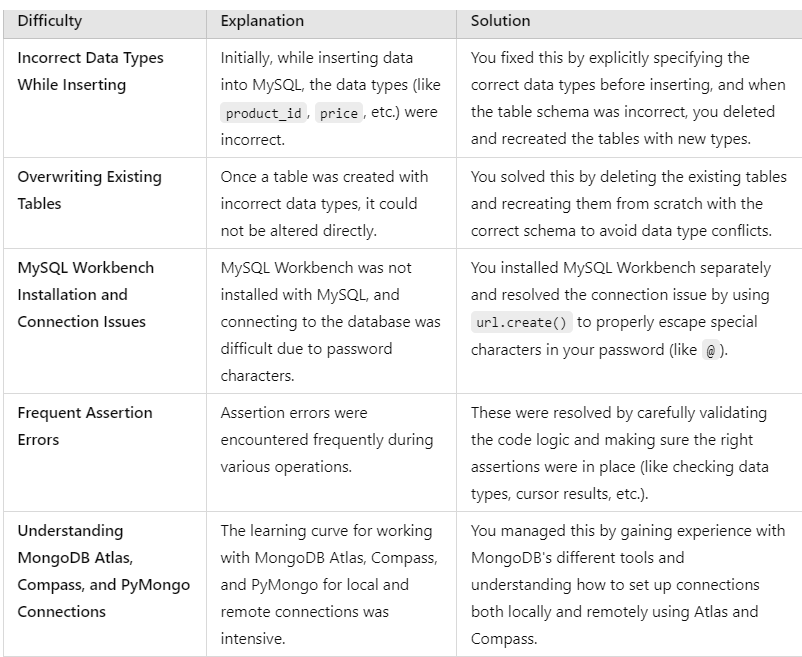

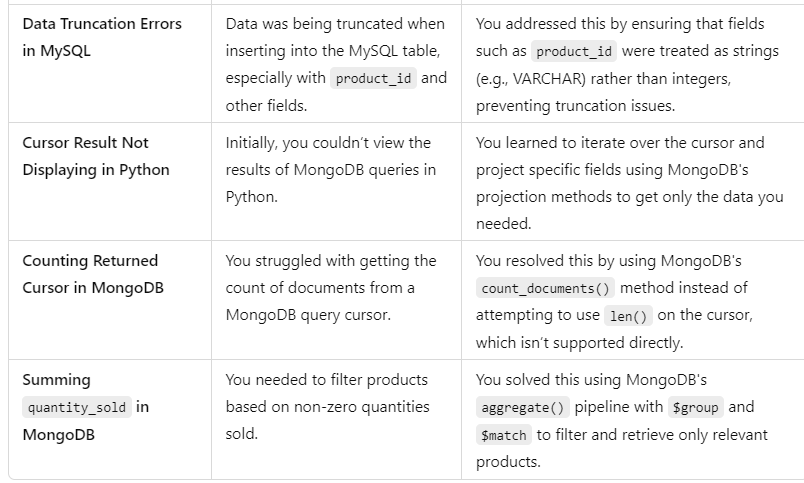